**Chapter 1**

Table 1.1

In [1]:
#Table 1.1 Molecular Weights
table_1_1_molecular_weights = {'Methane' : 16.04, 'Ethane' : 30.07, 'Propane' : 44.10, 'Isobutane' : 58.12, 
                               'Normal Butane' : 58.12, 'Isopentane' : 72.15, 'Normal Pentane' : 72.15, 'Normal Hexane' : 86.18,
                              'Normal Heptane' : 100.20, 'Normal Octane' : 114.23, 'Normal Nonane' : 128.26, 'Normal Decane' : 142.29,
                              'Carbon Dioxide' : 44.01, 'Hydrogen Sulfide' : 34.08, 'Nitrogen' : 28.01}

In [2]:
#Table 1.1 Critical Pressure and Temperatures
table_1_1_critical_properties = {'Methane' : (668, 343), 'Ethane' : (708, 550), 'Propane' : (616, 666), 'Isobutane' : (529, 735), 
                               'Normal Butane' : (551, 765), 'Isopentane' : (490, 829), 'Normal Pentane' : (489, 845), 'Normal Hexane' : (437, 913),
                              'Normal Heptane' : (397, 972), 'Normal Octane' : (361, 1024), 'Normal Nonane' : (332, 1070), 'Normal Decane' : (304, 1112),
                              'Carbon Dioxide' : (1071, 548), 'Hydrogen Sulfide' : (1306, 672), 'Nitrogen' : (493, 227)}


In [3]:
#Table 1.1 Composition of typical well gas
table_1_1_well_gas_composition = {'Methane' : 0.847, 'Ethane' : 0.0586, 'Propane' : 0.0220, 'Isobutane' : 0.0035, 
                               'Normal Butane' : 0.0058, 'Isopentane' : 0.0027, 'Normal Pentane' : 0.0025, 'Normal Hexane' : 0.0028,
                              'Normal Heptane' : 0.0028, 'Normal Octane' : 0.0015, 'Normal Nonane' : 0.0018, 'Normal Decane' : 0.0015,
                              'Carbon Dioxide' : 0.0130, 'Hydrogen Sulfide' : 0.0000, 'Nitrogen' : 0.0345}

The Z-Factor correlation chart of Standing and Katz

C:\Users\pmuehlebach\AppData\Local\Temp\ipykernel_14240\205676287.py:23: RuntimeWarning: invalid value encountered in power
  term_4 = (90.7*t - 242.2*t**2 + 42.4*t**3)*y**(2.18 + 2.82*t)


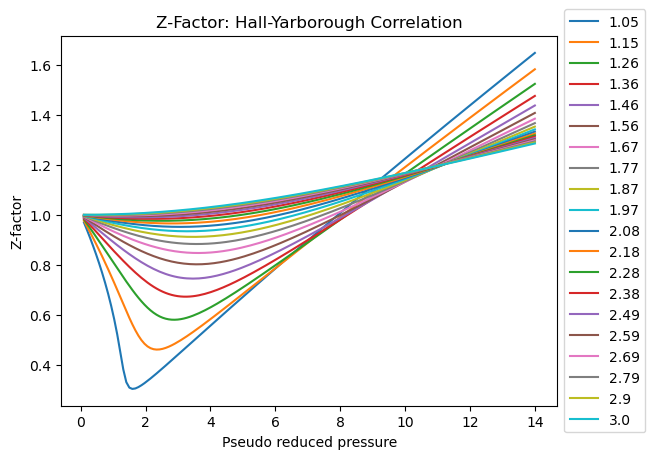

In [4]:
import math
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

plt.title('Z-Factor: Hall-Yarborough Correlation')
plt.xlabel('Pseudo reduced pressure')
plt.ylabel('Z-factor')

#Using the Hall-Yarborough equations...developed from the Starling Carnahan equation of state
Ppr = np.linspace(0.1, 14, num = 150) #pseudo reduced pressure
Tpr = np.linspace(1.05,3, num = 20) #pseudo reduced temperature
t = 1/Tpr #reciprocal of Tpr

#define non-linear reduced density equation
def reduced_density_equation(y_guess, Ppr, t):
    y = y_guess
    F = np.empty((1))
    
    term_1 = - 0.06125*Ppr*t*math.exp(-1.2*(1-t)**2)
    term_2 = (y + y**2 + y**3 - y**4)/(1-y)**3
    term_3 = - (14.76*t - 9.76*t**2 + 4.58 * t**3)*y**2
    term_4 = (90.7*t - 242.2*t**2 + 42.4*t**3)*y**(2.18 + 2.82*t)
    F[0] =  term_1 + term_2 + term_3 + term_4
    return F

for t_i in t:
    y_guess = np.array([t_i+.005])
    z_factor=np.empty((0))
    for Ppr_i in Ppr:
        y = fsolve(reduced_density_equation, y_guess, args=(Ppr_i,t_i), maxfev= 1000000)
        z_factor = np.append(z_factor, ((0.06125*Ppr_i*t_i)*math.exp(-1.2*(1-t_i)**2))/y)
    plt.plot(Ppr, z_factor)
plt.legend(np.round(1/t,2),loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

HUZAH! It is done! Took me forever again. Looks like there is a very complicated way to make the labels inline here (https://stackoverflow.com/questions/16992038/inline-labels-in-matplotlib)

*Exercise 1.1*

Problem 1

1) Calculate the density of the gas, at standard conditions, whose composition is listed in table 1.1.

In [24]:
#Create numpy arrays out of the dictionary values (thankfully they are in the smae order or I'd have to figure something else out)
molecular_weight_array = np.array(list(table_1_1_molecular_weights.values()), dtype = ((np.float64, (4,))))
composition_array = np.array(list(table_1_1_well_gas_composition.values()), dtype = ((np.float64, (4,))))

#calculate molecular weight with vector multiplication and summing up the result
molecular_weight_well_gas = np.sum(np.multiply(composition_array[:,1], molecular_weight_array[:,1]))
print(f'The molecular weight of typical well gas, at standard conditions, is: {round(molecular_weight_well_gas, 4)}')

#assume ideal gas equation
#calculate density, using R constant with units psi⋅ft3⋅lbmol−1⋅°R−1, will yield answer in lb/ft^3
density_well_gas = molecular_weight_well_gas * 14.7/(1*10.731*(520))
print(f'The density of typical well gas, at standard conditions, is: {round(density_well_gas, 4)}')

The molecular weight of typical well gas, at standard conditions, is: 19.9099
The density of typical well gas, at standard conditions, is: 0.0524


HOT DAMN, that took forever to code, but looks like I got it right. And, I got a little numpy worked in there.
On to the next one!

Problem 2

what is the gas pressure gradient in the reservoir at 2000 psia and 180° F?

In [25]:
#need to use density = Mp/ZRT

#First, determine critical properties of gas composition
critical_properties_array = np.array(list(table_1_1_critical_properties.values()), dtype = ((np.int64)))
pseudo_critical_pressure_gas = np.sum(np.multiply(composition_array[:,1], critical_properties_array[:,0]))
pseudo_critical_reduced_pressure_gas = 2000/pseudo_critical_pressure_gas
print(f'The pseduo-critical reduced pressure is {round(pseudo_critical_reduced_pressure_gas, 1)}')
pseudo_critical_temperature_gas = np.sum(np.multiply(composition_array[:,1], critical_properties_array[:,1]))
pseudo_critical_reduced_temperature_gas = (180 + 459.67)/pseudo_critical_temperature_gas
print(f'The pseudo-critical reduced temperature is {round(pseudo_critical_reduced_temperature_gas, 1)}')

#Now, determine the Z factor from the Hall-Yarborough
t_gas = 1/pseudo_critical_reduced_temperature_gas
Ppr_gas= pseudo_critical_reduced_pressure_gas
y_guess_gas = np.array([t_gas+.005])
y_gas = fsolve(reduced_density_equation, y_guess_gas, args=(Ppr_gas, t_gas), maxfev= 1000000)
z_factor_gas = ((0.06125*Ppr_gas*t_gas)*math.exp(-1.2*(1-t_gas)**2))/y_gas
print(f'The Z-Factor is {round(z_factor_gas[0], 4)}')

#calculate density, using R constant with units psi⋅ft3⋅lbmol−1⋅°R−1, will yield answer in lb/ft^3
gas_density = molecular_weight_well_gas*2000/(z_factor_gas[0] * (180+459.67) * 10.731)
#convert to ppg
gas_density_ppg = gas_density/7.48052
#Use hydrostatic equation
pressure_gradient = .052*gas_density_ppg
print(f'This is the gas pressure gradient at the given conditions {round(pressure_gradient, 4)}')

The pseduo-critical reduced pressure is 3.0
The pseudo-critical reduced temperature is 1.7
The Z-Factor is 0.8681
This is the gas pressure gradient at the given conditions 0.0464


All I can say is I hope I get faster at this...

*Exercise 1.2*

The following data are available for a newly discovered gas reservoir:

In [192]:
gas_water_contact = 9700
centroid_depth = 9537
net_bulk_volume = 1.776e10
porosity = 0.19
swc = 0.20
gas_density = 0.85

Although a gas sample was collected during a brief production test the reservoir
pressure was not recorded because of tool failure. It is known, however, that the water
pressure regime in the locality is...

In [193]:
#temp_gradient = 1.258/100
#water_pressure = 0.441 * depth + 31
#small change

NameError: name 'depth' is not defined